# **Importing Library**

In [1]:
import pandas as pd
import string
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")
from langdetect import detect

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\koushikg\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\koushikg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\koushikg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\koushikg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Importing all data**
Importing all singers separately

In [2]:
df_a=pd.read_csv("ArianaGrande.csv")
df_b=pd.read_csv("Beyonce.csv")
df_be=pd.read_csv("BillieEilish.csv")
df_ed=pd.read_csv("EdSheeran.csv")
df_j=pd.read_csv("JustinBieber.csv")
df_k=pd.read_csv("KatyPerry.csv")
df_l=pd.read_csv("LadyGaga.csv")
df_m5=pd.read_csv("Maroon5.csv")
df_p=pd.read_csv("PostMalone.csv")
df_r=pd.read_csv("Rihanna.csv")
df_s=pd.read_csv("SelenaGomez.csv")


df_all=[df_a,df_b,df_be,df_ed,df_j,df_k,df_l,df_m5,df_p,df_r,df_s]

for i in range(len(df_all)):
    if(df_all[i].columns[0]=="Unnamed: 0"):
        df_all[i]=df_all[i].drop("Unnamed: 0",axis=1)  #Dropping all unnamed columns


In [3]:
df_all

[            Artist                                       Title  \
 0    Ariana Grande                              ​thank u, next   
 1    Ariana Grande                                     7 rings   
 2    Ariana Grande                             ​God is a woman   
 3    Ariana Grande                                Side To Side   
 4    Ariana Grande                      ​​no tears left to cry   
 ..             ...                                         ...   
 303  Ariana Grande  God is a Woman (Excuse me i love you LIVE)   
 304  Ariana Grande                                      Magic*   
 305  Ariana Grande                                  Right here   
 306  Ariana Grande                                     Venuss*   
 307  Ariana Grande          One last time_Ariana_Grande_(2014)   
 
                Album        Date  \
 0      thank u, next  2018-11-03   
 1      thank u, next  2019-01-18   
 2          Sweetener  2018-07-13   
 3    Dangerous Woman  2016-05-20   
 4       

# **Cleaning**
* Removing the nan values,unreleased albums and songs sung in any other language than english. 
* Lyrics to words -> To convert all the Lyrics to word 
* To word -> Converts all the words and removes all the repetative words 
*  Count word -> This function can count all the unique and as well non unique words
*  Word stats -> To give the statistics of words.


In [4]:
def lyrics_to_words(document):
    stop_words = set(stopwords.words('english')) #To remove that doesnt count for sentiment like is,are
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

In [5]:
def toword(df):
    words = []
    df = df.reset_index(drop=True)
    
    for lyric in df['Lyric']:
        lyric=lyrics_to_words(lyric) #each lyric is given to the remove words that doesnt contribute sentiment,find base word
        lyric_list=lyric.split()     #From on we find each unique value from each lyric
        unique=[]
        for item in lyric_list:
            if(item not in unique):
                unique.append(item)
        words.append(unique)
    df['words'] = words
    return df

In [6]:
def cleaning(df):
    invalidTitles=[]
    i=0
    df1=df
    keywords=['remix','live','version','demo','reprise','copy','mix']
    for title in df['Title']:
        title_original=title #Temporarly storing title value
        title=title.lower()
        title=re.sub('[^a-zA-z0-9]',' ',title) #Removing characters all special characters like: (,#
        title=title.split() #converting into sentences
        for item in title:
            if(item in keywords):
                invalidTitles.append(title_original)
                break
    
    for t1 in df['Title']:
        for t2 in invalidTitles:
            if t1 == t2:
                df1=df1.drop(i)
        i=i+1
    
    df1.dropna(subset = ["Title"], inplace=True)
    df1.dropna(subset = ["Lyric"], inplace=True)
    df1.drop_duplicates(subset ="Title",keep = False, inplace = True)
    df1.drop_duplicates(subset ="Lyric",keep = False, inplace = True) 
    
    
    return df1

In [7]:
def countword(df):    
    
    c=[]
    for word in df['words']:
        for w in word:
            c.append(w)
    return c


In [8]:
def words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_news = []
    name = []
    
    for value in df.columns[1:]:
        unique_words.append(np.count_nonzero(df[value]))
        total_words.append(sum(df[value]))
        name.append(str(value))
        total_news.append(main_df['name'][main_df['name']==value].count())
        data = pd.DataFrame({'name':name,
                          'unique words':unique_words,
                          'total words':total_words,
                          'total songs':total_news})
    data['words per songs'] = round(data['total words'] / data['total songs'],0)
    data['words per songs'] = data['words per songs'].astype('int')
    return data

In [9]:
df_allc=[]
for df in df_all:
    df_c=cleaning(df)
    df_w=toword(df_c)
    df_allc.append(df_w)

frames=df_allc
df_main = pd.concat(frames,ignore_index=True)
df_main.dropna(thresh=1)
#df_main= df_main.drop(df_main[(df_main.Year < 1000) | (df_main.Year > 2021)].index)
df_main=df_main.reset_index(drop=True)

In [10]:
df_main

Artist                         Title            Album  \
0     Ariana Grande                ​thank u, next    thank u, next   
1     Ariana Grande                       7 rings    thank u, next   
2     Ariana Grande               ​God is a woman        Sweetener   
3     Ariana Grande                  Side To Side  Dangerous Woman   
4     Ariana Grande        ​​no tears left to cry        Sweetener   
...             ...                           ...              ...   
2034   Selena Gomez                      My World              NaN   
2035   Selena Gomez  ’Til I Finally Met the Moon*              NaN   
2036   Selena Gomez                Wildest dreams              NaN   
2037   Selena Gomez    De una vez psrsian English              NaN   
2038   Selena Gomez                    Stay Alive              NaN   

            Date                                              Lyric    Year  \
0     2018-11-03  thought i'd end up with sean but he wasn't a m...    2018   
1     2019-01-18  yeah breakfast at tiffany's and bottles of bub...    2019   
2     2018-07-13  you you love it how i move you you love it how...    2018   
3     2016-05-20  ariana grande  nicki minaj i've been here all ...    2016   
4     2018-04-20  right now i'm in a state of mind i wanna be in...    2018   
...          ...                                                ...     ...   
2034  2021-03-01  my world you tried to change it all but i said...  2021.0   
2035         NaN  snippet my heart skipped a beat when you smile...     NaN   
2036  2015-08-31  he said let's get out of this town drive out o...  2015.0   
2037         NaN  it doesn't hurt like before no دیگه مثل قبل اذ...     NaN   
2038  2021-03-01  first verse your smile was the purest thing in...  2021.0   

                                                  words  
0     [thought, id, end, sean, match, wrote, song, r...  
1     [yeah, breakfast, tiffany, bottle, bubble, gir...  
2     [love, move, touch, one, said, done, believe, ...  
3     [ariana, grande, nicki, minaj, ive, night, day...  
4     [right, im, state, mind, wanna, like, time, ai...  
...                                                 ...  
2034  [world, tried, change, said, hey, let, take, s...  
2035  [snippet, heart, skipped, beat, smiled, til, f...  
2036  [said, let, get, town, drive, city, away, crow...  
2037  [hurt, like, دیگه, مثل, قبل, اذیتم, نمیکنه, نه...  
2038  [first, verse, smile, purest, thing, miry, sto...  

[2039 rows x 7 columns]

##### *After appling all the function we generate a main dataframe.*
<br></br>
# **Preparing Data for visualization**

* The first visualization we'll look at it how many unique word vs total words these artist uses and lexicalrichness of each artist

In [11]:
before=[]
after=[]
length=[]
ulength=[]
wd=[]

for df in df_all:
    a,b=df.shape
    before.append(a)
    
for dfc in df_allc:
    a,b=dfc.shape
    after.append(a)  
    c=countword(dfc)
    l=len(c)
    ul=len(np.unique(c))
    wd.append(c)
    length.append(l)
    ulength.append(ul)

In [12]:
artists=['ArianaGrande','Beyonce','BillieEilish','EdSheeran','JustinBieber','KatyPerry','LadyGaga','Maroon5','PostMalone','Rihanna','SelenaGomez']
df_info =pd.DataFrame({'name':artists,'before':before,'after':after,'words':wd,'unique words':ulength,'word count':length})
df_info['diff']=df_info['before']-df_info['after']
df_info['words per songs'] = round(df_info['word count'] / df_info['after'],0)
df_info['words per songs'] = df_info['words per songs'].astype('int')
df_info['lexicalrichness']=(df_info['unique words']/df_info['word count'])*100
df_info=df_info[['name','before','after','diff','words','words per songs','unique words','word count','lexicalrichness']]
df_info

name  before  after  diff  \
0   ArianaGrande     308    207   101   
1        Beyonce     406    241   165   
2   BillieEilish     145     74    71   
3      EdSheeran     296    202    94   
4   JustinBieber     348    271    77   
5      KatyPerry     325    192   133   
6       LadyGaga     402    239   163   
7        Maroon5     197    125    72   
8     PostMalone     148    128    20   
9        Rihanna     405    250   155   
10   SelenaGomez     175    110    65   

                                                words  words per songs  \
0   [thought, id, end, sean, match, wrote, song, r...               65   
1   [beyoncé, ive, drinkin, get, filthy, liquor, t...               85   
2   [know, im, good, ive, learned, lose, cant, aff...               50   
3   [club, best, place, find, lover, bar, go, frie...               92   
4   [produced, benny, blanco, time, rained, parade...               70   
5   [refrain, know, strut, fuck, katy, perry, tige...               69   
6   [lady, gaga, r, kelly, yeah, oh, turn, mic, eh...               72   
7   [adam, levine, say, hey, baby, oh, mama, play,...               62   
8   [post, malone, hahahahaha, tank, god, ayy, ive...               85   
9   [rihanna, work, said, haffi, see, mi, dirt, pu...               66   
10  [promised, world, fell, put, first, adored, se...               53   

    unique words  word count  lexicalrichness  
0           3401       13485        25.220615  
1           5146       20522        25.075529  
2           1507        3720        40.510753  
3           4490       18650        24.075067  
4           3750       18904        19.837072  
5           3616       13329        27.128817  
6           4306       17288        24.907450  
7           1841        7724        23.834801  
8           3091       10823        28.559549  
9           2916       16532        17.638519  
10          1973        5799        34.023107

In [13]:
fig = go.Figure(data=[
    go.Bar(name='Unique Word Count', x=df_info['name'], y=df_info['unique words'].tolist()),
    go.Bar(name='Total Word Count', x=df_info['name'], y=df_info['word count'].tolist()),
    
])
# Change the bar mode
fig.update_layout(barmode='group',title={'text': "Total words vs Unique words",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [14]:
print(df_info[df_info.lexicalrichness == max(df_info['lexicalrichness'])].loc[:,'name'])
print(max(df_info['lexicalrichness']))
fig = px.bar(df_info, x='name',y='lexicalrichness')
fig.update_layout(title={'text': "Lexicalrichness of all artist",'y':1,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

2    BillieEilish
Name: name, dtype: object
40.51075268817204


* Now dividing the mail data frame to visualize how many songs artist sings over a year

In [15]:
df_group=df_main.groupby(['Artist','Year']).count().iloc[:,0:2]
#df_group=df_group.drop("Unnamed: 0",axis=1)
df_group =df_group.reset_index()
df_group

Artist    Year  Title  Album
0    Ariana Grande    2008      3      3
1    Ariana Grande    2009      2      1
2    Ariana Grande    2010      4      2
3    Ariana Grande    2011      6      1
4    Ariana Grande    2012      4      2
..             ...     ...    ...    ...
152   Selena Gomez  2017.0      6      4
153   Selena Gomez  2018.0      3      1
154   Selena Gomez  2019.0      4      2
155   Selena Gomez  2020.0     14     14
156   Selena Gomez  2021.0      7      1

[157 rows x 4 columns]

In [16]:
df_temp= df_group.drop('Artist',axis=1)
df_temp=df_temp.groupby(['Year']).count()
df_temp=df_temp.reset_index()
fig = px.line(df_temp, x='Year',y='Title')
fig.update_layout(title={'text': "No. of Titles by all artist from 2001-2021",'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

* Now let's look at the above visualization with respect to each artist.

Text(0.5, 1.0, 'Selena Gomez')

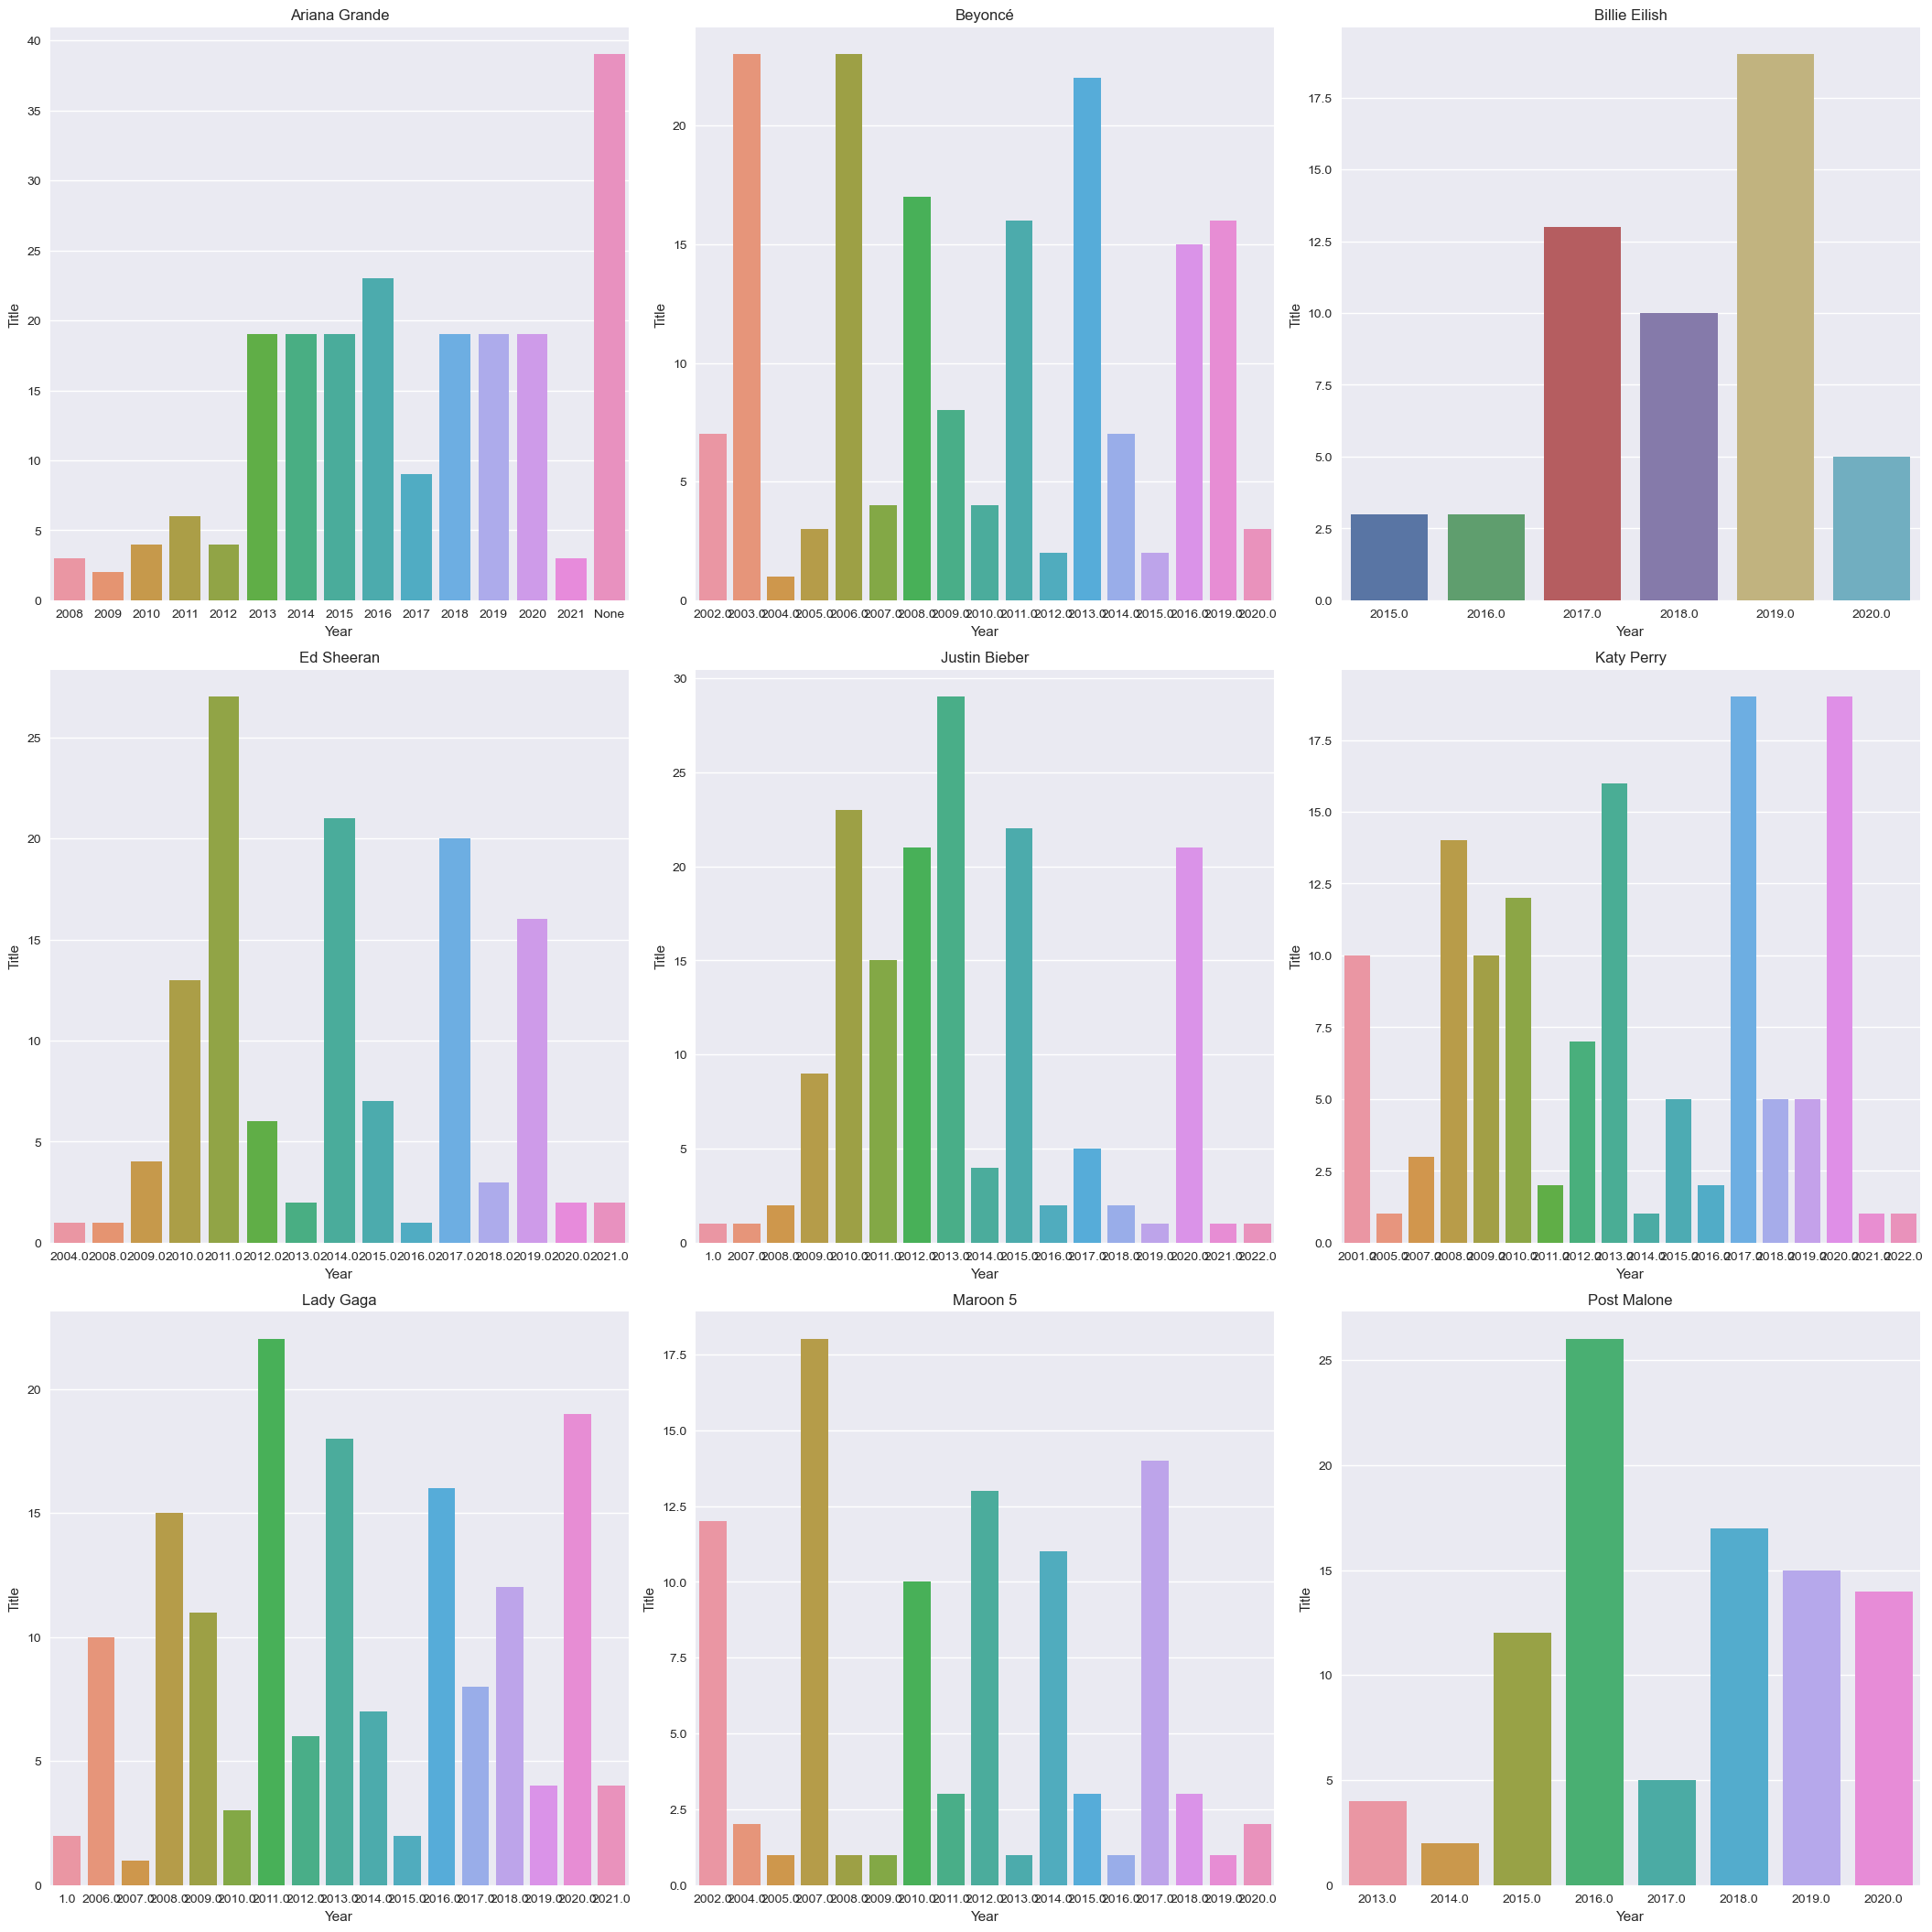

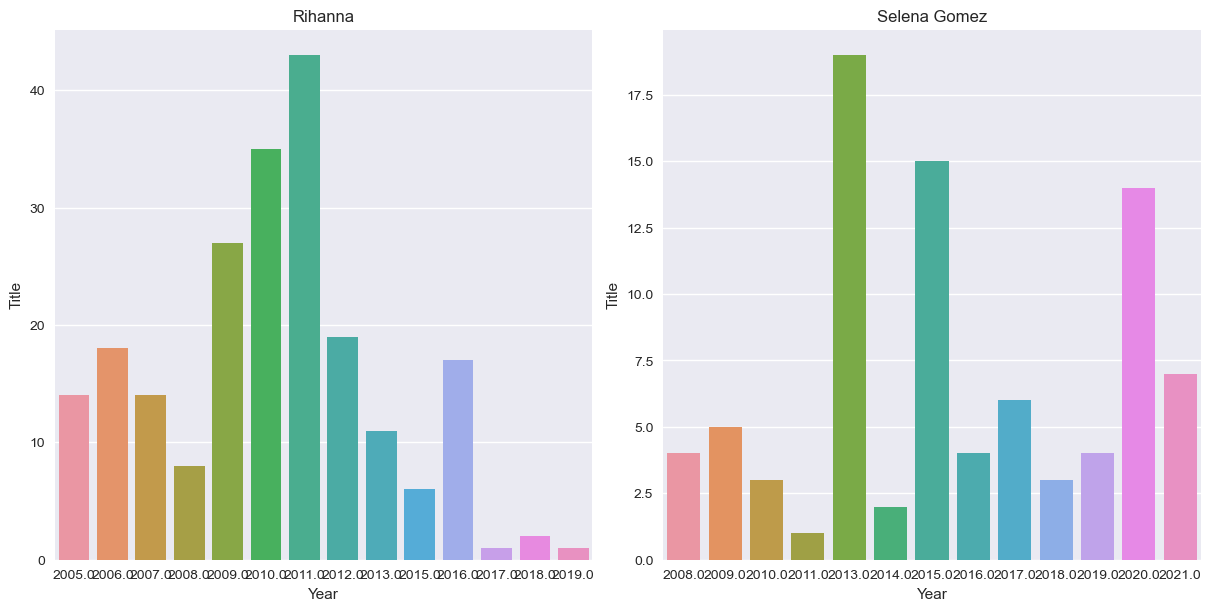

In [17]:
df_temp=[]
name=df_main['Artist'].unique()
name=name[0:9]
num_plots = 9
total_cols = 3
total_rows = 3
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for artist in df_main['Artist'].unique():
    df_temp.append(df_group[df_group['Artist']==artist])
for i, var in enumerate(name):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.barplot(data=df_temp[i],x="Year", y="Title",ax=axs[row][pos])
    axs[row][pos].set_title(name[i])


name=df_main['Artist'].unique()
name=name[9:11]
fig, axs = plt.subplots(nrows=1, ncols=2,
                        figsize=(12, 6), constrained_layout=True)
plot = sns.barplot(data=df_temp[9],x="Year", y="Title",ax=axs[0])
axs[0].set_title(name[0])
plot = sns.barplot(data=df_temp[10],x="Year", y="Title",ax=axs[1])
axs[1].set_title(name[1])

# Sentiment Analysis
Now we will analyze the sentiment of each song

Analysis is done with a function SentimentIntensityAnalyzer 

In [18]:

#Create lists to store the different scores for each word
def setimentanalyzer(df):
    neg='Negative'
    neu='Neutral'
    pos='Positive'
    negative = []
    neutral = []
    positive = []
    dominant_sentiment=[]
    dominant_sentiment_score=[]
    #Initialize the model
    sid = SentimentIntensityAnalyzer()
    #Iterate for each row of lyrics and append the scores
    for i in df.index:
       
        scores = sid.polarity_scores(df['Lyric'].iloc[i])
        negative.append(scores['neg'])
        neutral.append(scores['neu'])
        positive.append(scores['pos'])
        if scores['neg']>scores['pos']:
            dominant_sentiment_score.append(scores['neg'])
            dominant_sentiment.append(neg)
        elif scores['neg']<scores['pos']:
            dominant_sentiment_score.append(scores['pos'])
            dominant_sentiment.append(pos)
        else:
            dominant_sentiment_score.append(scores['neu'])
            dominant_sentiment.append(neu)
    #Create 5 columns to the main data frame  for each score
    df['negative'] = negative
    df['neutral'] = neutral
    df['positive'] = positive
    df['dominant_sentiment']=dominant_sentiment
    df['dominant_sentiment_score']=dominant_sentiment_score
    return df

In [19]:
df_sentiment=setimentanalyzer(df_main)
df_sentiment.head(10)

Artist                                      Title            Album  \
0  Ariana Grande                             ​thank u, next    thank u, next   
1  Ariana Grande                                    7 rings    thank u, next   
2  Ariana Grande                            ​God is a woman        Sweetener   
3  Ariana Grande                               Side To Side  Dangerous Woman   
4  Ariana Grande                     ​​no tears left to cry        Sweetener   
5  Ariana Grande                                 ​​breathin        Sweetener   
6  Ariana Grande  ​break up with your girlfriend, i’m bored    thank u, next   
7  Ariana Grande                                 ​positions        Positions   
8  Ariana Grande                                      34+35        Positions   
9  Ariana Grande                                   ​imagine    thank u, next   

         Date                                              Lyric  Year  \
0  2018-11-03  thought i'd end up with sean but he wasn't a m...  2018   
1  2019-01-18  yeah breakfast at tiffany's and bottles of bub...  2019   
2  2018-07-13  you you love it how i move you you love it how...  2018   
3  2016-05-20  ariana grande  nicki minaj i've been here all ...  2016   
4  2018-04-20  right now i'm in a state of mind i wanna be in...  2018   
5  2018-08-17  lacigam gnihtemos od ot thgin laiceps ruoy s't...  2018   
6  2019-02-08  you got me some type of way hmm ain't used to ...  2019   
7  2020-10-23  heaven sent you to me i'm just hopin i don't r...  2020   
8  2020-10-30  hmm   you might think i'm crazy the way i've b...  2020   
9  2018-12-14  step up the two of us nobody knows us get in t...  2018   

                                               words  negative  neutral  \
0  [thought, id, end, sean, match, wrote, song, r...     0.062    0.503   
1  [yeah, breakfast, tiffany, bottle, bubble, gir...     0.070    0.650   
2  [love, move, touch, one, said, done, believe, ...     0.000    0.733   
3  [ariana, grande, nicki, minaj, ive, night, day...     0.062    0.865   
4  [right, im, state, mind, wanna, like, time, ai...     0.079    0.716   
5  [lacigam, gnihtemos, od, ot, thgin, laiceps, r...     0.017    0.926   
6  [got, type, way, hmm, aint, used, feelin, mmmm...     0.122    0.636   
7  [heaven, sent, im, hopin, repeat, history, pre...     0.085    0.769   
8  [hmm, might, think, im, crazy, way, ive, cravi...     0.092    0.601   
9  [step, two, u, nobody, know, get, car, like, s...     0.018    0.766   

   positive dominant_sentiment  dominant_sentiment_score  
0     0.435           Positive                     0.435  
1     0.280           Positive                     0.280  
2     0.267           Positive                     0.267  
3     0.073           Positive                     0.073  
4     0.204           Positive                     0.204  
5     0.056           Positive                     0.056  
6     0.243           Positive                     0.243  
7     0.146           Positive                     0.146  
8     0.307           Positive                     0.307  
9     0.216           Positive                     0.216

Now based on the above table we do the follwing analyisis where we find out the dominant sentiment of each artist

Text(0.5, 1.0, 'Selena Gomez')

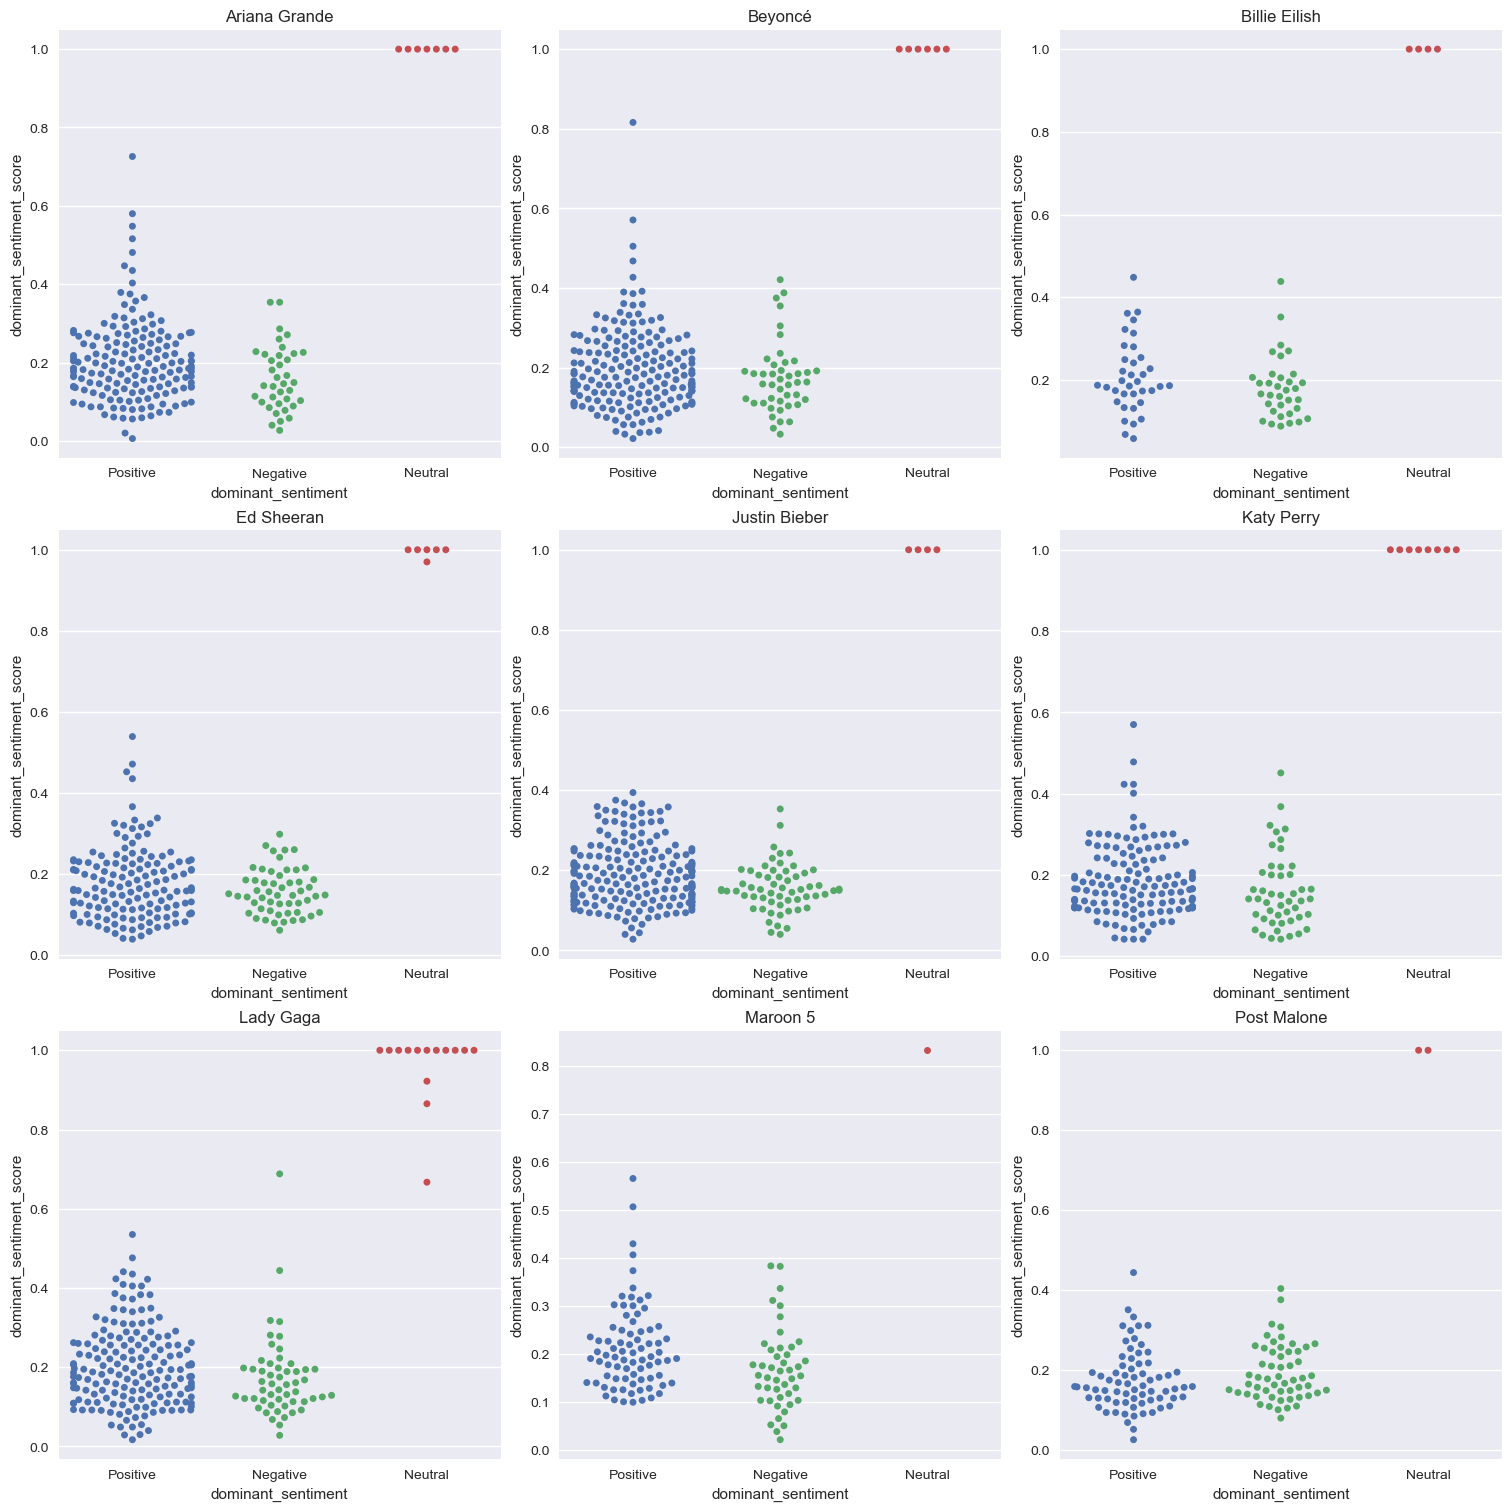

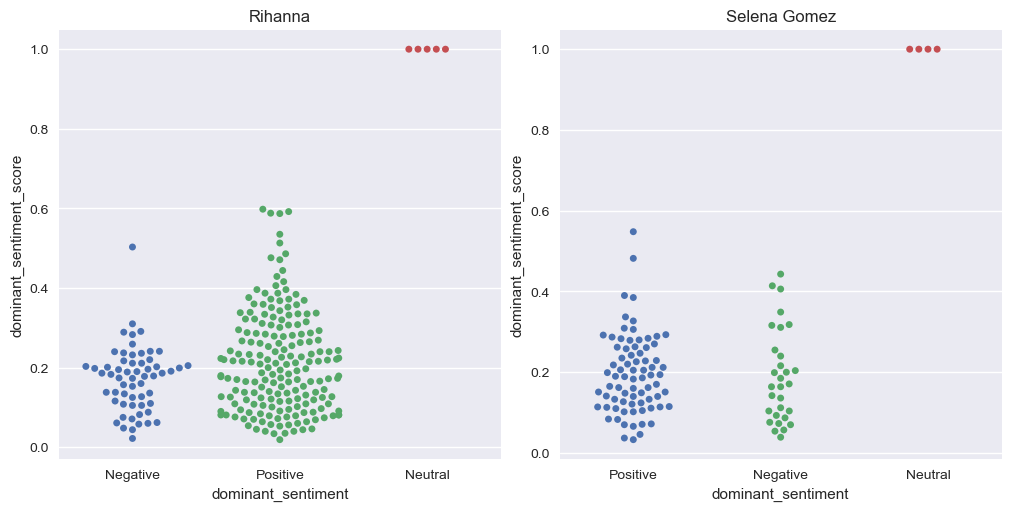

In [20]:
df_temp=[]
name=df_sentiment['Artist'].unique()
name=name[0:9]
num_plots = 9
total_cols = 3
total_rows = 3
#fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(5*total_cols, 5*total_rows), constrained_layout=True)
for artist in df_main['Artist'].unique():
    df_temp.append(df_sentiment[df_sentiment['Artist']==artist])
for i, var in enumerate(name):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.swarmplot(data=df_temp[i], x="dominant_sentiment", y="dominant_sentiment_score",ax=axs[row][pos])
    axs[row][pos].set_title(name[i])
    
name=df_main['Artist'].unique()
name=name[9:11]
fig, axs = plt.subplots(nrows=1, ncols=2,
                        figsize=(10, 5), constrained_layout=True)
plot = sns.swarmplot(data=df_temp[9], x="dominant_sentiment", y="dominant_sentiment_score",ax=axs[0])
axs[0].set_title(name[0])
plot = sns.swarmplot(data=df_temp[10], x="dominant_sentiment", y="dominant_sentiment_score",ax=axs[1])
axs[1].set_title(name[1])

In [21]:
means_df = df_sentiment.groupby(['Artist']).mean()
means_df

negative   neutral  positive  dominant_sentiment_score
Artist                                                               
Ariana Grande  0.075464  0.749039  0.175449                  0.223758
Beyoncé        0.076988  0.753033  0.170012                  0.211282
Billie Eilish  0.121257  0.740689  0.138054                  0.238378
Ed Sheeran     0.088698  0.762545  0.148752                  0.196921
Justin Bieber  0.074782  0.761863  0.163336                  0.193391
Katy Perry     0.086167  0.764031  0.149844                  0.212448
Lady Gaga      0.089339  0.745050  0.165661                  0.240100
Maroon 5       0.108960  0.729224  0.161856                  0.201720
Post Malone    0.126906  0.733523  0.139563                  0.195805
Rihanna        0.086456  0.733560  0.179988                  0.221136
Selena Gomez   0.094473  0.748782  0.156755                  0.223918

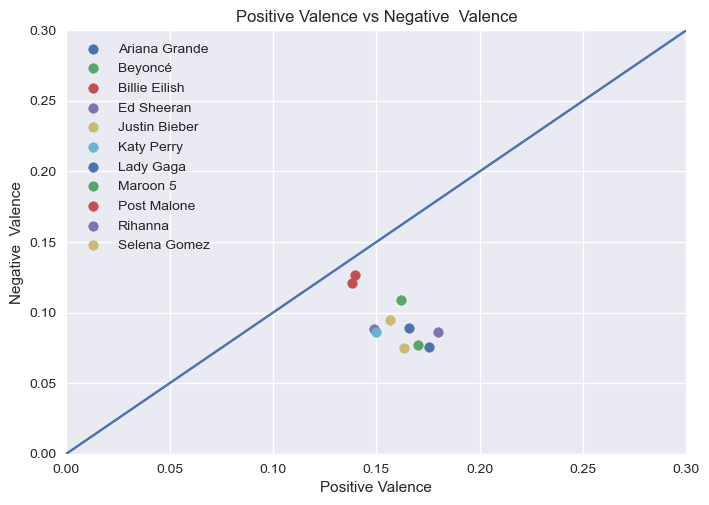

In [22]:
x = np.linspace(0, 10, 1000)
for name, group in means_df.groupby('Artist'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()
plt.xlim([0,0.3])
plt.ylim([0,0.3])
plt.plot(x, x+0, linestyle='solid')
plt.title("Positive Valence vs Negative  Valence")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()#positive and negative region